# 011: k nearest neighbors

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append("../")
from metrics import f_score, auc_roc
from models import KNearestNeighbors

%load_ext autoreload
%autoreload 2

In [4]:
train = np.load("../data/dataset_prep/train.npz")
x_train = train["x_train"]
y_train = train["y_train"]

In [19]:
knn = KNearestNeighbors(metric=f_score, use_pca=True)
num_samples = 50000
knn.hyperparameter_tuning(x_train[:num_samples], y_train[:num_samples], verbose=True)
knn.train(x_train[:num_samples], y_train[:num_samples])
predictions = knn.predict(x_train[num_samples:num_samples+10], scores=True)

(2500, 321)
Evaluating variance=0.05
Reduced to 2 features
Predicting sample 0/2500
Predicting sample 1000/2500
Predicting sample 2000/2500
Evaluating k=3
Best threshold: 0.005 with score 0.26216216216216215
Evaluating k=7
Best threshold: 0.145 with score 0.27722772277227725
Evaluating k=13
Best threshold: 0.155 with score 0.2807017543859649
Evaluating k=27
Best threshold: 0.15 with score 0.29888268156424586
Evaluating k=55
Best threshold: 0.20500000000000002 with score 0.3105360443622921
Evaluating k=109
Best threshold: 0.225 with score 0.32608695652173914
Evaluating k=217
Best threshold: 0.165 with score 0.33089311859443626
Evaluating k=327
Best threshold: 0.17 with score 0.3343558282208589
Evaluating k=435
Best threshold: 0.16 with score 0.3309143686502177
Evaluating k=871
Best threshold: 0.215 with score 0.3231441048034934
Evaluating k=1743
Best threshold: 0.23 with score 0.32701421800947866
Evaluating k=3487
Best threshold: 0.165 with score 0.3223684210526316
Evaluating k=6975
Bes

In [17]:
knn.k

217

In [20]:
predictions = knn.predict(x_train[num_samples:num_samples+4000], scores=True)
auc_roc(predictions, y_train[num_samples:num_samples+4000])

Predicting sample 0/4000
Predicting sample 1000/4000
Predicting sample 2000/4000
Predicting sample 3000/4000


np.float64(0.8296112394503603)

(array([1488.,  615.,  397.,  218.,  143.,   58.,   54.,   16.,    8.,
           3.]),
 array([0.    , 0.0375, 0.075 , 0.1125, 0.15  , 0.1875, 0.225 , 0.2625,
        0.3   , 0.3375, 0.375 ]),
 <BarContainer object of 10 artists>)

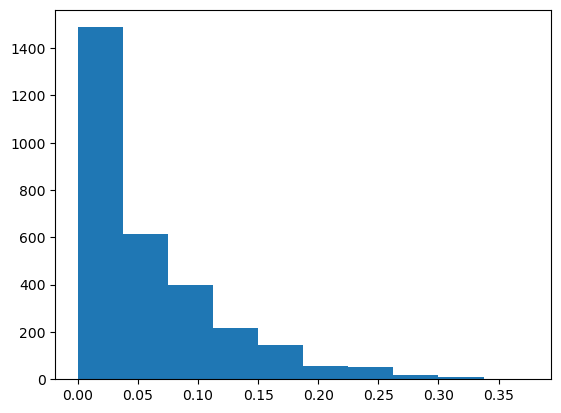

In [54]:
plt.hist(predictions)


# With PCA

In [6]:
knn = KNearestNeighbors(metric=f_score, use_pca=True)
num_samples = 20000
knn.hyperparameter_tuning(x_train[:num_samples], y_train[:num_samples], verbose=True)

knn.train(x_train[:num_samples], y_train[:num_samples])
predictions = knn.predict(x_train[num_samples:num_samples+5000])
print(f"F1 Score: {f_score(predictions, y_train[num_samples:num_samples+5000])}")
print(knn.variance, knn.k, knn.decision_threshold)

(1000, 321)
Evaluating variance=0.05
Reduced to 2 features
Predicting sample 0/1000
Evaluating k=35
Best threshold: 0.145 with score 0.36
Evaluating k=69
Best threshold: 0.16 with score 0.3357142857142857
Evaluating k=137
Best threshold: 0.135 with score 0.35428571428571426
Evaluating k=173
Best threshold: 0.145 with score 0.3448275862068966
Evaluating k=207
Best threshold: 0.14 with score 0.3539823008849558
Evaluating k=275
Best threshold: 0.145 with score 0.3486238532110092
Evaluating k=551
Best threshold: 0.135 with score 0.35820895522388063
Evaluating k=1103
Best threshold: 0.13 with score 0.3610315186246419
Evaluating k=2205
Best threshold: 0.15 with score 0.35125448028673834
Evaluating k=4411
Best threshold: 0.12 with score 0.3597560975609756
Evaluating k=8821
Best threshold: 0.1 with score 0.35327635327635326
Evaluating variance=0.1
Reduced to 4 features
Predicting sample 0/1000
Evaluating k=35
Best threshold: 0.145 with score 0.36721311475409835
Evaluating k=69
Best threshold: 